# 1) Video approximation via orthogonal basis


Given the following gray scale video, stored as a matrix of size $(m,n,nf)$, where $nf$ is the number of frame, we compute an approximation of the video background using an orthogonal basis for the  column space of the matrix of size $(m*n,nf)$ obtained by rewriting each image as column vectors.

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

shape video 120 160


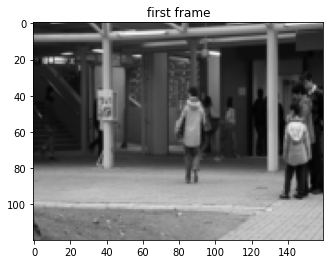

In [3]:
import scipy.io as sio
f = sio.loadmat('vol21.mat')
VV=f['vol']
(m,n,nf)=VV.shape
print('shape video',m,n)

VVM=VV.reshape(m*n,nf)

imgplot = plt.imshow(VV[:,:,0],cmap='gray')
plt.title('first frame')
plt.show()


1) Perform the URV factorization by using the QR factorization. In order to compute the QR factorization use the scipy routine qr of the  modulus linalg with pivoting set to true in order to have the elements of the rectangular matrix ordered:
    
[QV,RV,PV]=spl.qr(VVM,pivoting=True,mode='economic')

note that PV contains the index of the permuted columns  of VVM and the algorithm find an orthogonal matrix QV and a rectangular matrix RV such that 

VVM[:,PV]=QV*RV

- Then perform the QR factorization on the RV transposed such that $RV^\top = B$. The factorized original matrix can be seen as:
$$
VVM[:,Pimg] = QV*B.T * V.T
$$


- Given the tolerances 1e-1,5e-2,1e-2,5e-3, compute an approximation of the video by choosing only nc columns of the matrix QV, nc rows of the matrix B and nc columns of the matrix V.  The value for nc is computed as follows: 

  a) extract the diagonal elements of B and copy them in Bdiag,
    
  b) scale the absolute values of Bdiag with respect to its absolute maximum,
    
  c) compute nc as the number of elements of Bdiag that are smaller of the chosen tolerance.
    
- To compare the videos compute the correlation between the reconstructed video and the original one by writing the two videos as two vectors. 

- Plot the first and the last approximated frames and comment the results.

2) Compute a similar approximation using the singular value decomposition. Approximate the video using the truncated singular values with $k$ chosen such that the relative two norm of the approximation error is less than 1e-1,5e-2,1e-2,5e-3.
   
  - To compare the videos compute the correlation between the reconstructed video and the original one by writing the two videos as two vectors. 

  - Plot the first and the last approximated frames and comment the results.

3) It is possible to have information about the video background? 

4) Looking at the video with  the differences beetween VVM and the truncated SVD with $k=1$ what information can we deduce?







# 2) Perceptron

Implement a model that describes a linear classifier that divides the Cartesian plane into two halves, the line in the test-data  is $y=-3x +2$. We want to learn a parameter vector such that our model makes the right prediction. This model is called a linear perceptron. Write two cost functions that minimize the distance in the  1-norm and in the infinity norm, respectively. 


In [4]:
import scipy.optimize


In [5]:
def activation(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return activation(np.inner(w,x)+b)

Train the neuron with the following data:

In [6]:

data = np.array([[[-2,8.5],+1],
       [[-3.6,12],-1],
       [[2,-5],-1],
       [[3,-6.5],+1]],dtype=object)

data1 = np.array([p[0] for p in data if p[1]>0])
data2 = np.array([p[0] for p in data if p[1]<0])


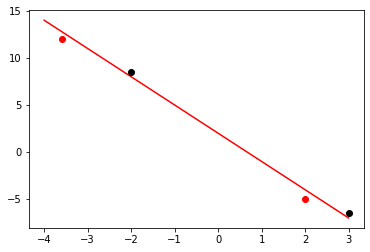

In [7]:
plt.plot([-4,3],[14,-7],'r', data1[::,0], data1[::,1],'ko',  data2[::,0], data2[::,1],'ro');

Find the correct label for the following dataset:

dataset = np.random.randn(100,2)

- by using scipy.optimize.minimize;
- by implementing the line-search method with the steepest descend direction and constant value of the step-length; use different values of the steplength and different values of the initial approximation; 


Compare the results.